In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle


In [25]:
def saddle(x1, x2):
    return x1 * x2

N = 500
X = np.random.random((N, 2)) * 4 - 2  # in between (-2, +2)
Y = X[:, 0] * X[:, 1]  # makes a saddle shape


In [26]:
D = 2  #p number of samples
M = 100  # num hidden units

In [27]:
# layer 1
W = np.random.randn(D, M) / np.sqrt(D)
b = np.zeros(M)

# layer 2
V = np.random.randn(M) / np.sqrt(M)
c = 0

In [28]:
# how to get the output
# consider the params global
def forward(X):
    Z = X.dot(W) + b
    Z = Z * (Z > 0)  # relu
    # Z = np.tanh(Z)

    Yhat = Z.dot(V) + c
    return Z, Yhat


# how to train the params
def derivative_V(Z, Y, Yhat):
    return (Y - Yhat).dot(Z)


def derivative_c(Y, Yhat):
    return (Y - Yhat).sum()


def derivative_W(X, Z, Y, Yhat, V):
    # dZ = np.outer(Y - Yhat, V) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(Y - Yhat, V) * (Z > 0)  # relu
    return X.T.dot(dZ)


def derivative_b(Z, Y, Yhat, V):
    # dZ = np.outer(Y - Yhat, V) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(Y - Yhat, V) * (Z > 0)  # this is for relu activation
    return dZ.sum(axis=0)


def update(X, Z, Y, Yhat, W, b, V, c, learning_rate=1e-4):
    gV = derivative_V(Z, Y, Yhat)
    gc = derivative_c(Y, Yhat)
    gW = derivative_W(X, Z, Y, Yhat, V)
    gb = derivative_b(Z, Y, Yhat, V)

    V += learning_rate * gV
    c += learning_rate * gc
    W += learning_rate * gW
    b += learning_rate * gb

    return W, b, V, c


# so we can plot the costs later
def get_cost(Y, Yhat):
    return ((Y - Yhat)**2).mean()


In [37]:
costs = []
for i in range(200000):
    Z, Yhat = forward(X)
    W, b, V, c = update(X, Z, Y, Yhat, W, b, V, c)
    cost = get_cost(Y, Yhat)
    costs.append(cost)
    if i % 25000 == 0:
        print(cost)

0.0011878992033588945
0.0007026891119962516
0.0005573098479670487
0.00043971368291942993
0.00036006522755327995
0.00027326013112104945
0.00024095496045519545
0.00022054135130502434


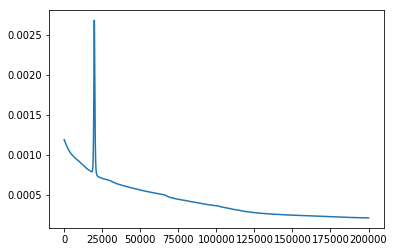

In [38]:
plt.plot(costs)
plt.show()


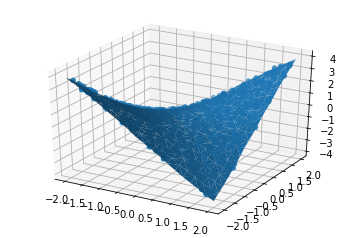

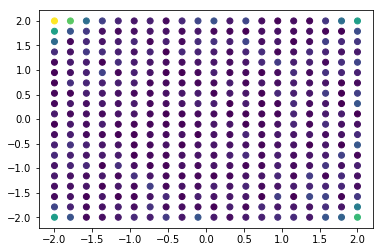

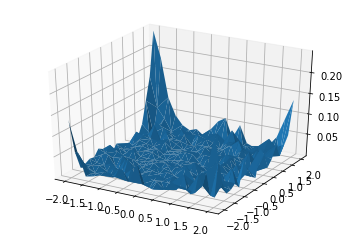

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
_, Yhat = forward(Xgrid)
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True)
plt.show()


# plot magnitude of residuals
Ygrid = Xgrid[:, 0] * Xgrid[:, 1]
R = np.abs(Ygrid - Yhat)

plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=R)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], R, linewidth=0.2, antialiased=True)
plt.show()